In [37]:
!gdown --id 1HlB__fxpnxeUnPOrfIMAR5UCYkpry-3n

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HlB__fxpnxeUnPOrfIMAR5UCYkpry-3n
To: /content/worlds all cities with their avg temp - Sheet1.xlsx
100% 47.0k/47.0k [00:00<00:00, 61.3MB/s]


In [38]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_excel('worlds all cities with their avg temp - Sheet1.xlsx')
df.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
0,Algeria,Algiers,11.2\n(52.2),11.9\n(53.4),12.8\n(55.0),14.7\n(58.5),17.7\n(63.9),21.3\n(70.3),24.6\n(76.3),25.2\n(77.4),23.2\n(73.8),19.4\n(66.9),15.2\n(59.4),12.1\n(53.8),17.4\n(63.3),[1]
1,Algeria,Tamanrasset,12.8\n(55.0),15.0\n(59.0),18.1\n(64.6),22.2\n(72.0),26.1\n(79.0),28.9\n(84.0),28.7\n(83.7),28.2\n(82.8),26.5\n(79.7),22.4\n(72.3),17.3\n(63.1),13.9\n(57.0),21.7\n(71.1),[2]
2,Algeria,Reggane,16.0\n(60.8),18.2\n(64.8),23.1\n(73.6),27.9\n(82.2),32.2\n(90.0),36.4\n(97.5),39.8\n(103.6),38.4\n(101.1),35.5\n(95.9),29.2\n(84.6),22.0\n(71.6),17.8\n(64.0),28.3\n(82.9),[3]
3,Angola,Luanda,26.7\n(80.1),28.5\n(83.3),28.6\n(83.5),28.2\n(82.8),27.0\n(80.6),23.9\n(75.0),22.1\n(71.8),22.1\n(71.8),23.5\n(74.3),25.2\n(77.4),26.7\n(80.1),26.9\n(80.4),25.8\n(78.4),[4]
4,Benin,Cotonou,27.3\n(81.1),28.5\n(83.3),28.9\n(84.0),28.6\n(83.5),27.8\n(82.0),26.5\n(79.7),25.8\n(78.4),25.6\n(78.1),26.0\n(78.8),26.7\n(80.1),27.6\n(81.7),27.3\n(81.1),27.2\n(81.0),[5]


In [40]:
import re

for item in df.columns[2:15]:
    df[item + "_"] = df[item].apply(lambda x: float(re.findall(r'[-+]?\d*\.\d+|\d+', str(x))[0]) if isinstance(x, str) else x)


In [41]:
df.columns

Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.', 'Jan_', 'Feb_',
       'Mar_', 'Apr_', 'May_', 'Jun_', 'Jul_', 'Aug_', 'Sep_', 'Oct_', 'Nov_',
       'Dec_', 'Year_'],
      dtype='object')

In [42]:
df.drop(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.'], axis =1 , inplace = True)
df.head()

,Country,City,Jan_,Feb_,Mar_,Apr_,May_,Jun_,Jul_,Aug_,Sep_,Oct_,Nov_,Dec_,Year_
0,Algeria,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,17.4
1,Algeria,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,21.7
2,Algeria,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,28.3
3,Angola,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,25.8
4,Benin,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,27.2


In [43]:
df.shape

(470, 15)

In [44]:
df.nunique()

Country    174
City       461
Jan_       197
Feb_       218
Mar_       223
Apr_       235
May_       216
Jun_       214
Jul_       209
Aug_       201
Sep_       198
Oct_       207
Nov_       208
Dec_       202
Year_      215
dtype: int64

In [45]:
sum(df.duplicated())

4

In [46]:
df['City'].value_counts()

La Paz        2
Hamilton      2
St. John's    2
San Juan      2
Algiers       1
             ..
Tabriz        1
Ahvaz         1
Tehran        1
Erbil         1
Caracas       1
Name: City, Length: 461, dtype: int64

In [47]:
df[(df["City"] == 'La Paz') | (df["City"]== 'Hamilton') | (df["City"]=="St. John's") | (df["City"]=='San Juan')]

,Country,City,Jan_,Feb_,Mar_,Apr_,May_,Jun_,Jul_,Aug_,Sep_,Oct_,Nov_,Dec_,Year_
284,Antigua and Barbuda,St. John's,25.4,25.2,25.6,26.3,27.2,27.9,28.2,28.3,28.1,27.5,26.8,25.9,26.9
289,Bermuda,Hamilton,18.3,18.0,18.2,19.6,22.0,25.0,27.2,27.6,26.6,24.4,21.6,19.5,22.3
299,Canada,St. John's,88.0,88.0,88.0,1.9,6.4,10.9,15.8,16.1,12.4,7.4,3.0,88.0,5.0
318,Mexico,La Paz,17.4,18.1,19.7,22.1,24.5,27.1,29.7,30.2,29.3,26.2,22.0,18.6,23.7
329,Puerto Rico,San Juan,25.3,25.5,26.1,26.8,27.7,28.5,28.6,28.7,28.6,28.1,27.0,24.8,27.2
402,New Zealand,Hamilton,18.4,18.8,17.1,14.5,11.9,9.5,8.9,9.8,11.6,13.2,14.9,16.9,13.8
425,Argentina,San Juan,27.1,25.5,22.8,17.2,12.2,8.3,7.7,10.6,14.4,19.8,23.4,26.3,17.9
430,Bolivia,La Paz,9.3,9.0,8.9,8.8,8.2,7.3,6.8,8.2,8.7,10.0,10.5,9.7,8.8


In [48]:
list = []
for items in (df.columns)[2:14]:
    list.append(round(df[items].mean(),2))
list[:5]

[30.19, 27.08, 24.07, 19.9, 20.66]

In [49]:
avg_df = pd.DataFrame((dict(zip(pd.Series(df.columns)[2:14], pd.Series(list))).items()), columns = ['Month','Temperature (ºC)'])
avg_df.head()

,Month,Temperature (ºC)
0,Jan_,30.19
1,Feb_,27.08
2,Mar_,24.07
3,Apr_,19.90
4,May_,20.66


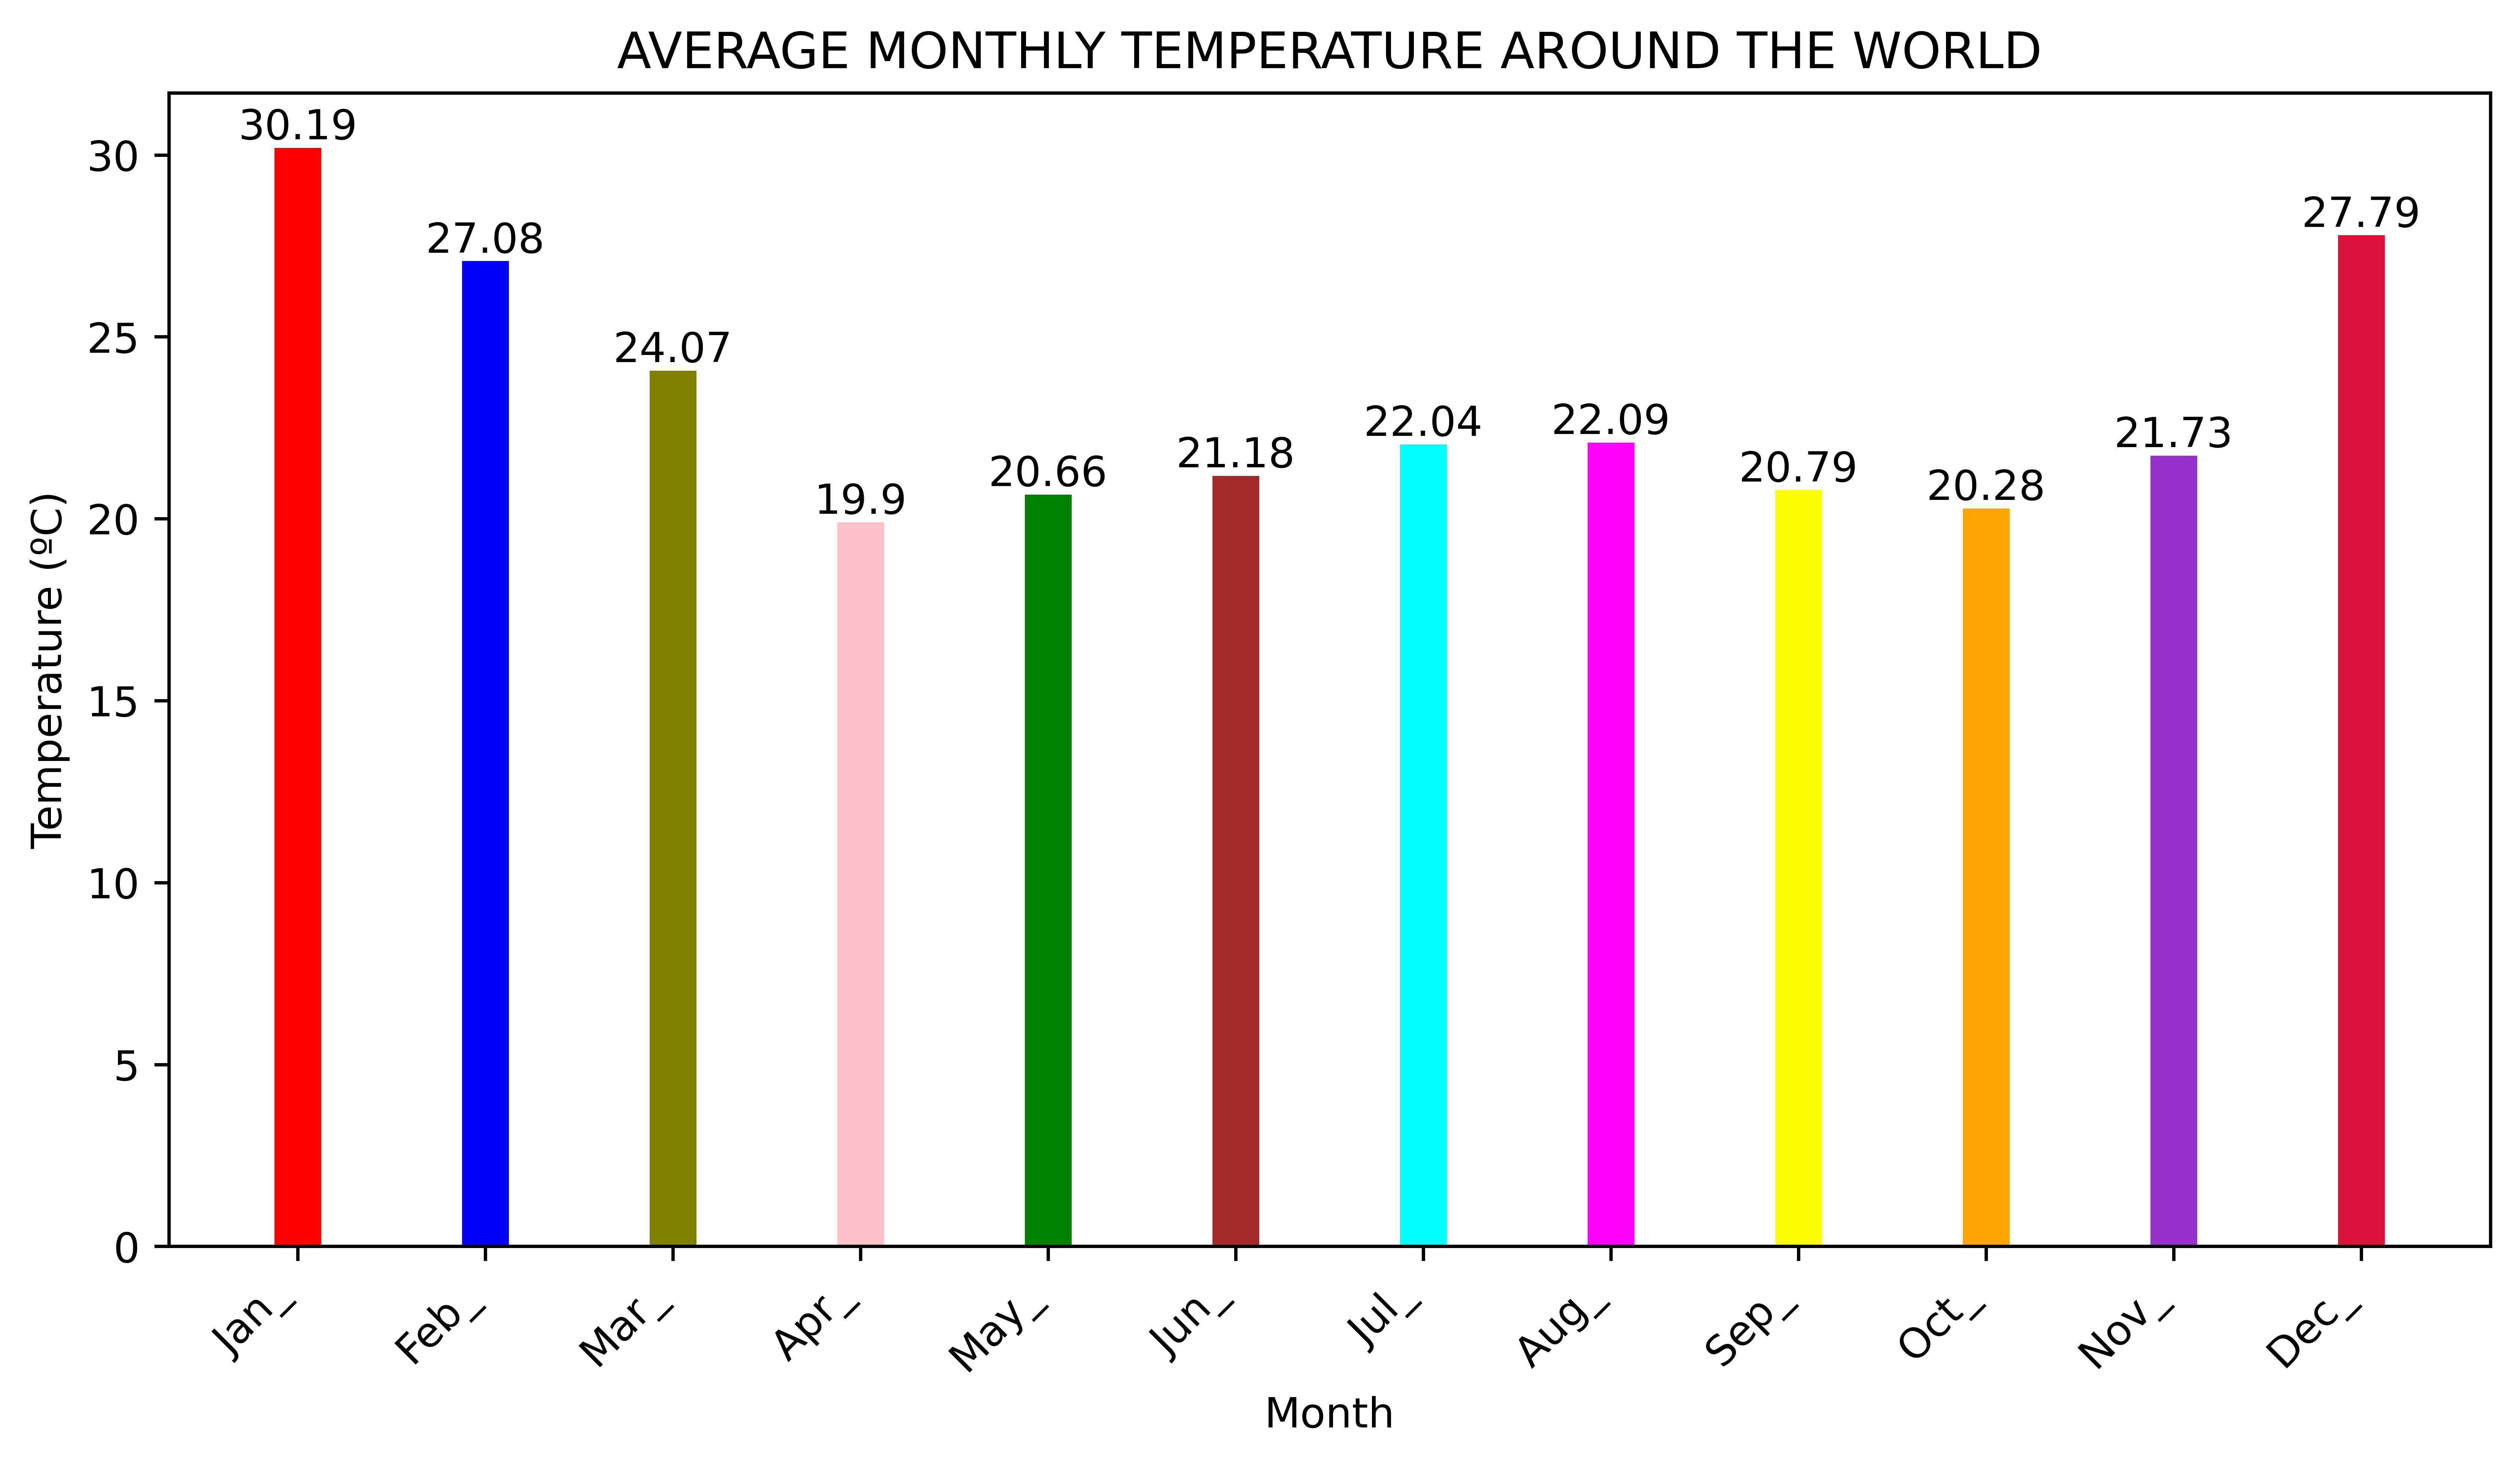

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5), dpi = 800)

barplot = plt.bar(avg_df['Month'], avg_df['Temperature (ºC)'], color = ['red', 'blue', 'olive','pink','green','brown', 'cyan', 'magenta','yellow','orange','darkorchid','crimson'], width = 0.25)
plt.xlabel("Month")
plt.ylabel("Temperature (ºC)")
plt.title("AVERAGE MONTHLY TEMPERATURE AROUND THE WORLD")
plt.xticks(rotation=45, ha='right')
plt.bar_label(barplot , labels= round(avg_df['Temperature (ºC)'],3), label_type='edge')
plt.show()

In [51]:
country_df = df.groupby("Country").mean()
country_df.reset_index(inplace = True)
country_df.head()

,Country,Jan_,Feb_,Mar_,Apr_,May_,Jun_,Jul_,Aug_,Sep_,Oct_,Nov_,Dec_,Year_
0,Afghanistan,88.000000,88.000000,6.3,12.8,17.300000,22.800000,25.000000,24.1,19.7,13.100000,5.900000,0.6,12.100000
1,Albania,6.700000,7.800000,10.0,13.4,18.000000,21.600000,24.000000,23.8,20.7,16.000000,11.700000,8.1,15.200000
2,Algeria,13.333333,15.033333,18.0,21.6,25.333333,28.866667,31.033333,30.6,28.4,23.666667,18.166667,14.6,22.466667
3,Andorra,2.200000,3.500000,5.8,7.5,11.500000,15.400000,18.800000,18.5,14.9,10.300000,5.700000,3.0,9.800000
4,Angola,26.700000,28.500000,28.6,28.2,27.000000,23.900000,22.100000,22.1,23.5,25.200000,26.700000,26.9,25.800000


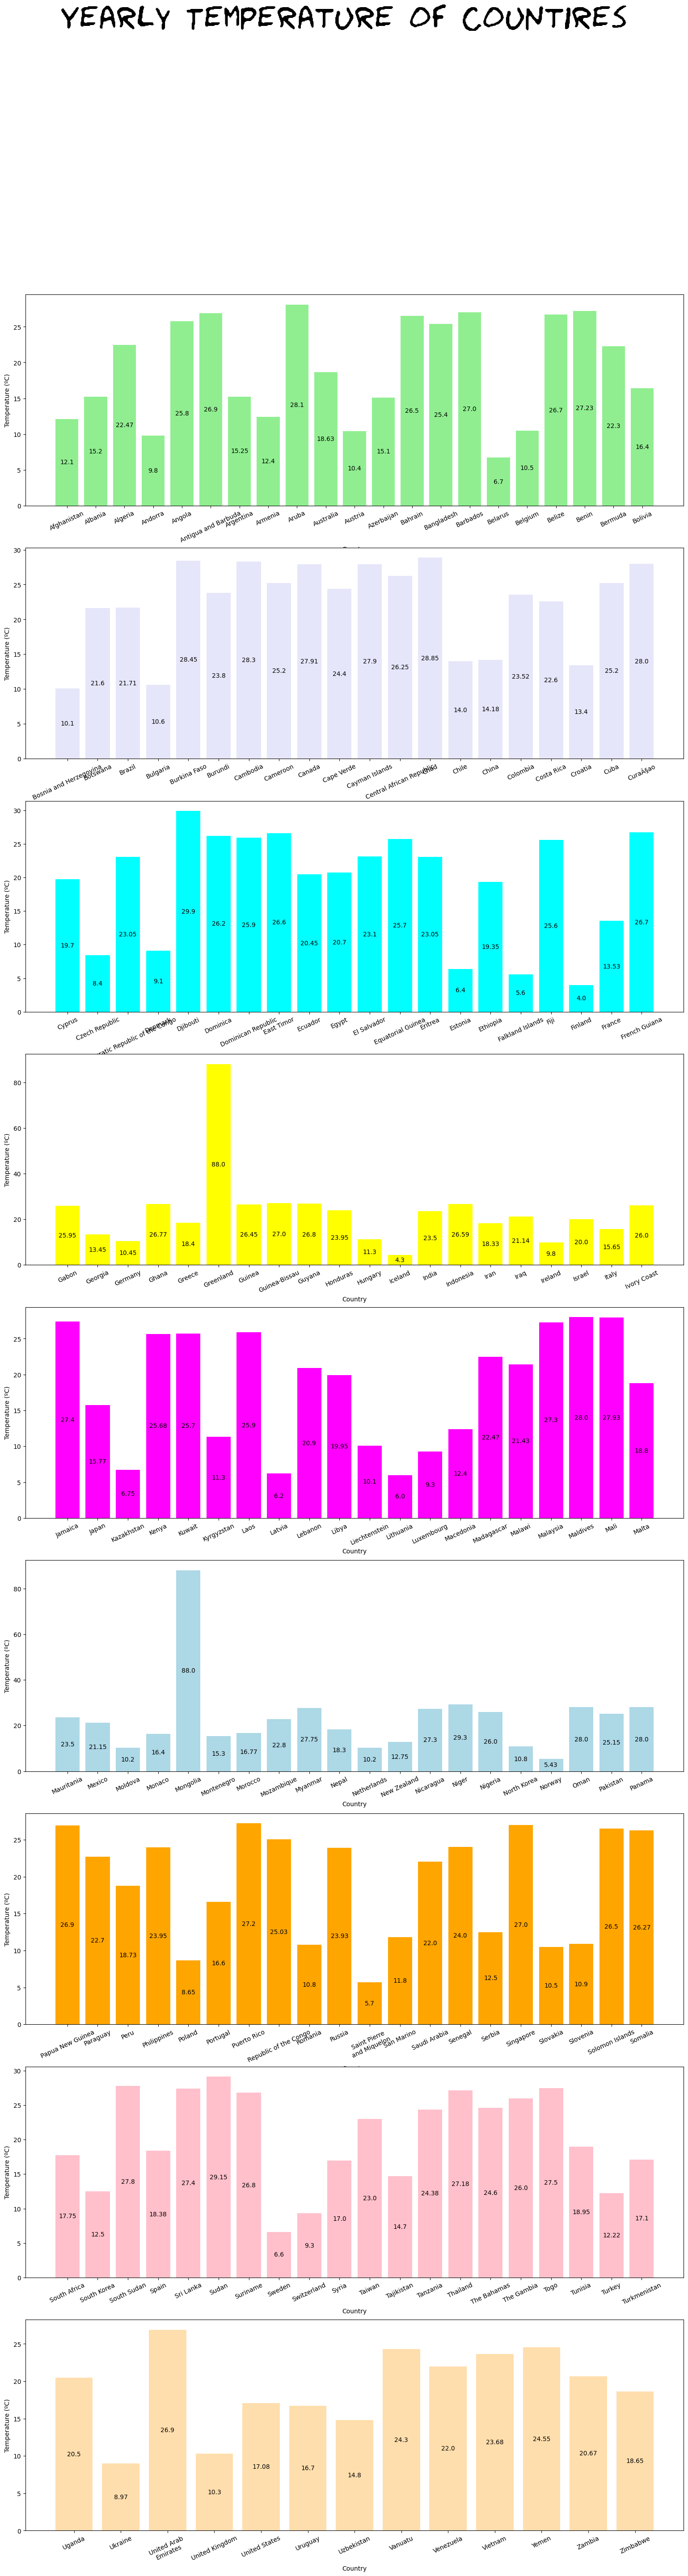

In [52]:
fig, axs = plt.subplots(9)
fig.set_size_inches(19,65)
    
fig.suptitle('Yearly Temperature of Countires',fontdict= {'family':'fantasy','color':'black'} , fontsize = 50)
axsbar0 = axs[0].bar(country_df['Country'][:21],country_df["Year_"][:21],color= "lightgreen")
plt.bar_label( axsbar0 , labels= round(country_df["Year_"][:21],2),label_type='center')
axsbar1 = axs[1].bar(country_df['Country'][21:41],country_df["Year_"][21:41],color= "lavender")
plt.bar_label( axsbar1 , labels= round(country_df["Year_"][21:41],2),label_type='center')
axsbar2 = axs[2].bar(country_df['Country'][41:61],country_df["Year_"][41:61],color= "cyan")
plt.bar_label( axsbar2 , labels= round(country_df["Year_"][41:61],2),label_type='center')
axsbar3 = axs[3].bar(country_df['Country'][61:81],country_df["Year_"][61:81],color= "yellow")
plt.bar_label( axsbar3 , labels= round(country_df["Year_"][61:81],2),label_type='center')
axsbar4 = axs[4].bar(country_df['Country'][81:101],country_df["Year_"][81:101],color= "magenta")
plt.bar_label( axsbar4 , labels= round(country_df["Year_"][81:101],2),label_type='center')
axsbar5 = axs[5].bar(country_df['Country'][101:121],country_df["Year_"][101:121],color= "lightblue")
plt.bar_label( axsbar5 , labels= round(country_df["Year_"][101:121],2),label_type='center')
axsbar6  = axs[6].bar(country_df['Country'][121:141],country_df["Year_"][121:141],color= "orange")     
plt.bar_label( axsbar6 , labels= round(country_df["Year_"][121:141],2),label_type='center')
axsbar7 = axs[7].bar(country_df['Country'][141:161],country_df["Year_"][141:161],color= "pink")
plt.bar_label( axsbar7 , labels= round(country_df["Year_"][141:161],2),label_type='center')
axsbar8 = axs[8].bar(country_df['Country'][161:174],country_df["Year_"][161:174],color= "navajowhite")
plt.bar_label( axsbar8 , labels= round(country_df["Year_"][161:174],2),label_type='center')


axs[0].set_xticklabels(country_df['Country'][:21], rotation=25)
axs[1].set_xticklabels(country_df['Country'][21:41], rotation=25)
axs[2].set_xticklabels(country_df['Country'][41:61], rotation=25)
axs[3].set_xticklabels(country_df['Country'][61:81], rotation=25)
axs[4].set_xticklabels(country_df['Country'][81:101], rotation=25)
axs[5].set_xticklabels(country_df['Country'][101:121], rotation=25)
axs[6].set_xticklabels(country_df['Country'][121:141], rotation=25)
axs[7].set_xticklabels(country_df['Country'][141:161], rotation=25)
axs[8].set_xticklabels(country_df['Country'][161:174], rotation=25)

for ax in axs.flat:
    ax.set(xlabel='Country', ylabel='Temperature (ºC)')
    
